In [180]:
import numpy as np
import pandas as pd

In [181]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [182]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [183]:
match.shape

(1095, 20)

In [184]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [185]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
335982    1         222
          2          82
335983    1         240
          2         207
335984    1         129
                   ... 
1426310   2         174
1426311   1         175
          2         139
1426312   1         113
          2         114
Name: total_runs, Length: 2217, dtype: int64

In [186]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [187]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [188]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [189]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [190]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [191]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [192]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [193]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans'  # include this if you're using it
]



In [194]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [195]:
match_df.shape

(962, 22)

In [196]:
print(match_df.columns)


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')


In [197]:
match_df.shape

(962, 22)

In [198]:
print(match_df.columns.tolist())


['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2', 'match_id', 'total_runs']


In [199]:
match_df = match_df[['id', 'city', 'winner', 'total_runs']]

In [200]:
print(delivery.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [201]:
delivery_df = match_df.merge(delivery, left_on='id', right_on='match_id')

In [202]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [203]:
delivery_df.shape

(110596, 21)

In [204]:
delivery_df.groupby('match_id').cumsum()['total_runs_y']

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [205]:
# Optionally make a deep copy to avoid chained assignment problems
delivery_df = delivery_df.copy()

# Now safely convert the column to numeric
delivery_df.loc[:, 'total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Now assign the cumulative sum
delivery_df.loc[:, 'current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [206]:
delivery_df.loc[:, 'current_score']

124         1
125         2
126         2
127         3
128         4
         ... 
229416    110
229417    111
229418    112
229419    113
229420    114
Name: current_score, Length: 110596, dtype: int64

In [207]:
delivery_df

,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229416,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
229417,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
229418,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
229419,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [208]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

In [232]:
delivery_df['balls_bowled'] = delivery_df['over'] * 6 + (delivery_df['ball'] - 1)
delivery_df['balls_left'] = 120 - delivery_df['balls_bowled']
delivery_df['balls_left'] = delivery_df['balls_left'].clip(lower=0)  # prevent negative


In [233]:
delivery_df

,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,221,120,10,0.050000,0.0,0,0
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,220,119,10,0.099174,0.0,0,1
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,220,118,10,0.098361,0.0,0,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,NaN,NaN,3,219,117,10,0.146341,0.0,0,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,NaN,NaN,4,218,116,10,0.193548,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229416,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,NaN,NaN,110,3,62,8,5.156250,0.0,1,58
229417,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,NaN,NaN,111,2,61,8,5.162791,0.0,1,59
229418,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,NaN,NaN,112,1,60,8,5.419355,0.0,1,60
229419,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,NaN,NaN,113,0,59,8,5.424000,-0.0,1,61


In [234]:
# Fill NaNs in 'player_dismissed' with "0"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Convert non-null dismissals to "1"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")

# Convert the column to integer
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# Compute cumulative wickets per match
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Subtract from 10 to get wickets remaining
delivery_df['wickets'] = 10 - wickets

# View the updated DataFrame
delivery_df.head()


,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,221,120,9,0.050000,0.0,0,0
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,220,119,8,0.099174,0.0,0,1
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,220,118,7,0.098361,0.0,0,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,NaN,NaN,3,219,117,6,0.146341,0.0,0,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,NaN,NaN,4,218,116,5,0.193548,0.0,0,4


In [235]:
delivery_df.head()



,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,221,120,9,0.050000,0.0,0,0
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,220,119,8,0.099174,0.0,0,1
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,220,118,7,0.098361,0.0,0,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,NaN,NaN,3,219,117,6,0.146341,0.0,0,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,NaN,NaN,4,218,116,5,0.193548,0.0,0,4


In [236]:
#crr = runs/overs

In [237]:
(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

124             inf
125       12.000000
126        6.000000
127        6.000000
128        6.000000
            ...    
229416    11.379310
229417    11.288136
229418    11.200000
229419    11.114754
229420    11.032258
Length: 110596, dtype: float64

In [238]:

delivery_df[delivery_df['balls_left'] > 120][['match_id', 'balls_left', 'current_score']]
delivery_df['balls_left'] = 120 - delivery_df.groupby('match_id').cumcount()
delivery_df['balls_left'] = delivery_df['over'] * 6 - delivery_df.groupby('match_id').cumcount()
delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left'])


In [239]:
delivery_df['crr']

124       0.050000
125       0.099174
126       0.098361
127       0.146341
128       0.193548
            ...   
229416    5.156250
229417    5.162791
229418    5.419355
229419    5.424000
229420    5.428571
Name: crr, Length: 110596, dtype: float64

In [240]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [241]:
delivery_df['rrr']

124               inf
125      -1320.000000
126       -660.000000
127       -438.000000
128       -327.000000
             ...     
229416      -2.250000
229417      -1.333333
229418      -1.500000
229419      -0.000000
229420       1.000000
Name: rrr, Length: 110596, dtype: float64

In [242]:
# Correct runs left
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

# Required Run Rate
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']


In [243]:
delivery_df['rrr']

124               inf
125      -1320.000000
126       -660.000000
127       -438.000000
128       -327.000000
             ...     
229416      -2.250000
229417      -1.333333
229418      -1.500000
229419      -0.000000
229420       1.000000
Name: rrr, Length: 110596, dtype: float64

In [244]:
import numpy as np

delivery_df['rrr'] = delivery_df['rrr'].replace([np.inf, -np.inf], np.nan).fillna(0)
delivery_df['rrr'] = delivery_df['rrr'].clip(lower=0)  # RRR can’t be negative


In [245]:

delivery_df['rrr'] = delivery_df['rrr'].round(2)


In [246]:

delivery_df['rrr']

124       0.0
125       0.0
126       0.0
127       0.0
128       0.0
         ... 
229416    0.0
229417    0.0
229418    0.0
229419   -0.0
229420    1.0
Name: rrr, Length: 110596, dtype: float64

In [247]:

delivery_df

,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,221,0,9,0.050000,0.0,0,0
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,220,-1,8,0.099174,0.0,0,1
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,220,-2,7,0.098361,0.0,0,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,NaN,NaN,3,219,-3,6,0.146341,0.0,0,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,NaN,NaN,4,218,-4,5,0.193548,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229416,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,NaN,NaN,110,3,-8,-53,5.156250,0.0,1,58
229417,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,NaN,NaN,111,2,-9,-54,5.162791,0.0,1,59
229418,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,NaN,NaN,112,1,-4,-55,5.419355,0.0,1,60
229419,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,NaN,NaN,113,0,-5,-56,5.424000,-0.0,1,61


In [248]:

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [249]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [250]:
delivery_df

,id,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,221,0,9,0.050000,0.0,0,0
125,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,220,-1,8,0.099174,0.0,0,1
126,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,220,-2,7,0.098361,0.0,0,2
127,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,NaN,NaN,3,219,-3,6,0.146341,0.0,0,3
128,335982,Bangalore,Kolkata Knight Riders,222,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,NaN,NaN,4,218,-4,5,0.193548,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229416,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,NaN,NaN,110,3,-8,-53,5.156250,0.0,1,58
229417,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,NaN,NaN,111,2,-9,-54,5.162791,0.0,1,59
229418,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,NaN,NaN,112,1,-4,-55,5.419355,0.0,1,60
229419,1426312,Chennai,Kolkata Knight Riders,113,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,NaN,NaN,113,0,-5,-56,5.424000,-0.0,1,61


In [251]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [252]:
final_df = final_df.sample(final_df.shape[0])

In [253]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
211292,Sunrisers Hyderabad,Rajasthan Royals,Jaipur,155,-1,-34,214,2.92562,0.0,1


In [254]:
# Calculate balls_bowled
delivery_df['balls_bowled'] = delivery_df['over'] * 6 + (delivery_df['ball'] - 1)

# Fix balls_left
delivery_df['balls_left'] = 120 - delivery_df['balls_bowled']
delivery_df['balls_left'] = delivery_df['balls_left'].clip(lower=1)  # avoid 0 in denominator

# Fix runs_left
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['runs_left'] = delivery_df['runs_left'].clip(lower=0)

# Calculate RRR
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']

# Clean infinite/NaN values
import numpy as np
delivery_df['rrr'] = delivery_df['rrr'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Optional: round for display
delivery_df['rrr'] = delivery_df['rrr'].round(2)


In [255]:

final_df = final_df.sample(final_df.shape[0])


In [256]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
24574,Deccan Chargers,Kings XI Punjab,Johannesburg,85,-4,-31,134,2.370968,0.0,0


In [257]:
# 🏏 Fix: Balls Bowled and Balls Left
delivery_df['ball'] = delivery_df['ball'].clip(upper=6)
delivery_df['balls_bowled'] = delivery_df['over'] * 6 + (delivery_df['ball'] - 1)
delivery_df['balls_left'] = 120 - delivery_df['balls_bowled']
delivery_df['balls_left'] = delivery_df['balls_left'].clip(lower=1)

# 🏏 Fix: Runs Left
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['runs_left'] = delivery_df['runs_left'].clip(lower=0)

# 🏏 Fix: Wickets Lost
# This should be max 10 — calculate it properly:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
delivery_df['wickets'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = delivery_df['wickets'].clip(upper=10)

# 🏏 Fix: Current Run Rate (CRR)
delivery_df['crr'] = (delivery_df['current_score'] * 6) / delivery_df['balls_bowled'].replace(0, 1)

# 🏏 Fix: Required Run Rate (RRR)
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']
delivery_df['rrr'] = delivery_df['rrr'].replace([np.inf, -np.inf], np.nan).fillna(0)
delivery_df['rrr'] = delivery_df['rrr'].clip(lower=0)


In [258]:
delivery_df[['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].sample(5)


,runs_left,balls_left,wickets,total_runs_x,crr,rrr
118961,129,100,10,162,9.900000,7.740000
137790,103,94,10,127,5.538462,6.574468
191923,149,97,10,175,6.782609,9.216495
61250,101,89,10,153,10.064516,6.808989
80195,12,11,10,132,6.605505,6.545455


In [259]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [260]:

final_df = final_df.sample(final_df.shape[0])

In [261]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
143098,Chennai Super Kings,Sunrisers Hyderabad,Mumbai,77,46,10,139,5.027027,10.043478,1


In [268]:
final_df.dropna(inplace=True)

In [269]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [270]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
61266,Kolkata Knight Riders,Delhi Daredevils,Delhi,81,73,10,153,9.191489,6.657534
212247,Rajasthan Royals,Kolkata Knight Riders,Kolkata,95,103,10,149,19.058824,5.533981
221195,Mumbai Indians,Chennai Super Kings,Mumbai,202,116,5,206,6.000000,10.448276
133780,Kings XI Punjab,Kolkata Knight Riders,Kolkata,102,73,10,191,11.361702,8.383562
99153,Kolkata Knight Riders,Delhi Daredevils,Delhi,0,12,10,146,8.166667,0.000000
...,...,...,...,...,...,...,...,...,...
79461,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,76,96,10,106,7.500000,4.750000
155237,Mumbai Indians,Kolkata Knight Riders,Kolkata,72,25,10,232,10.105263,17.280000
40058,Chennai Super Kings,Kings XI Punjab,Dharamsala,190,112,9,192,1.500000,10.178571
79448,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,95,108,10,106,5.500000,5.277778


In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')
 

In [274]:
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

In [277]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [278]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [279]:
y_pred = pipe.predict(X_test)

In [280]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8080986757183153

In [281]:
pipe.predict_proba(X_test)[10]

array([0.81413113, 0.18586887])

In [286]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball'] == 6]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x','crr','rrr','result']]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100, 1)
    temp_df['win'] = np.round(result.T[1]*100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target- ", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

In [287]:
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [293]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball'] == 6]
    
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
                     'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]
    temp_df = temp_df[temp_df['balls_left'] != 0]

    if temp_df.empty:
        print(f"No valid deliveries to compute progression for match_id={match_id}")
        return None, None

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100, 1)
    temp_df['win'] = np.round(result.T[1]*100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target- ", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [302]:
temp_df,target = match_progression(delivery_df, 501204,pipe)
temp_df

Target-  151


,end_of_over,runs_after_over,wickets_in_over,lose,win
42668,1,8,4,9.1,90.9
42669,2,0,-1,9.3,90.7
42670,3,0,-1,9.5,90.5
42676,4,5,-2,12.0,88.0
42682,5,13,0,7.9,92.1
42688,6,15,0,4.5,95.5
42689,7,0,0,4.5,95.5
42695,8,2,0,6.5,93.5
42701,9,14,0,3.9,96.1
42707,10,2,0,5.7,94.3


In [299]:
delivery_df['match_id'].unique()  # check if 125 exists


array([ 335982,  335983,  335984,  335985,  335986,  335987,  335988,
        335989,  335990,  335991,  335992,  335993,  335994,  335995,
        335996,  335997,  335998,  335999,  336000,  336001,  336003,
        336034,  336004,  336005,  336006,  336007,  336008,  336009,
        336010,  336011,  336013,  336014,  336015,  336016,  336017,
        336018,  336020,  336021,  336022,  336023,  336024,  336025,
        336026,  336027,  336028,  336029,  336031,  336032,  336033,
        336002,  336035,  336036,  336037,  336012,  336019,  336038,
        336039,  336040,  392181,  392182,  392183,  392184,  392185,
        392186,  392188,  392189,  392190,  392191,  392192,  392194,
        392195,  392196,  392197,  392198,  392199,  392200,  392201,
        392202,  392203,  392204,  392205,  392206,  392207,  392208,
        392209,  392210,  392211,  392212,  392213,  392214,  392215,
        392216,  392217,  392218,  392219,  392220,  392221,  392222,
        392223,  392

Text(0.5, 1.0, 'Target-151')

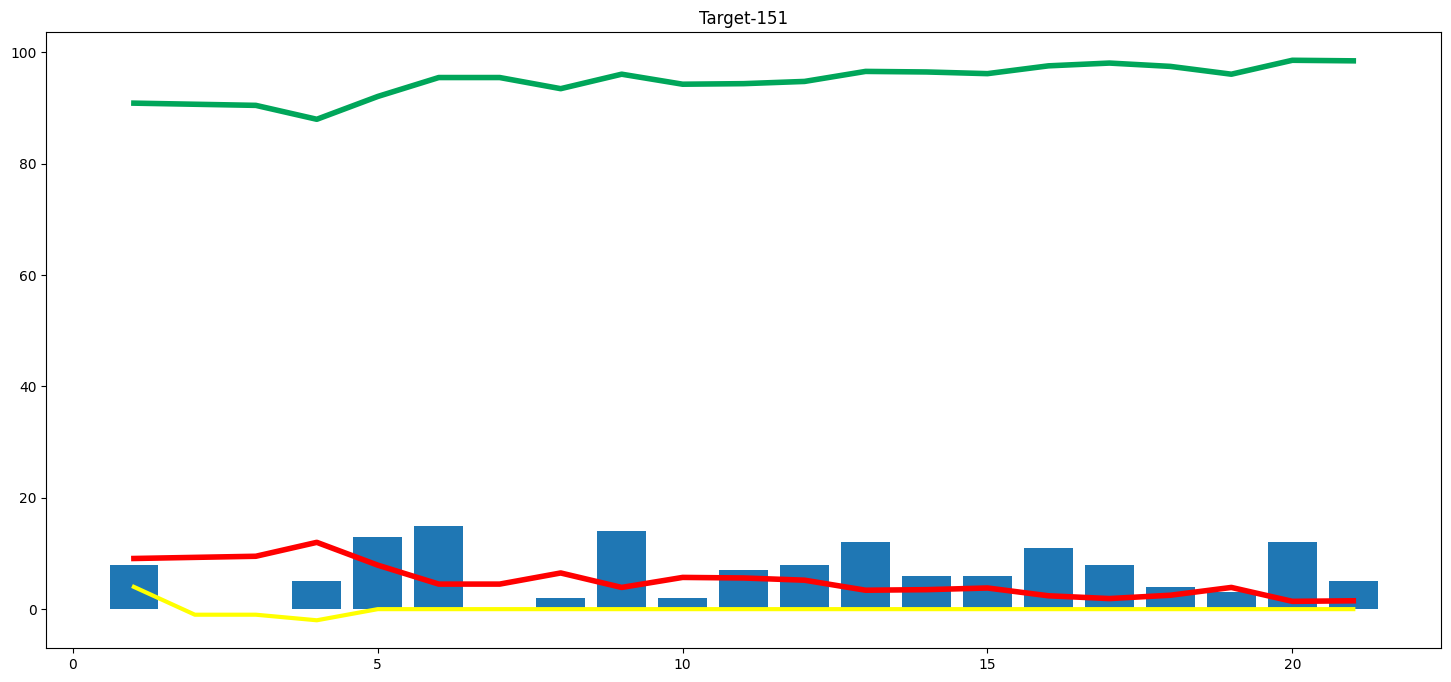

In [303]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [304]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bengaluru',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans']

In [305]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Guwahati', 'Mohali'], dtype=object)

In [307]:
import pickle
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)
